In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
m_1 = 1
m_2 = 0.5
c = 1
omega = 1
a = 1

k_1 = np.arcsin(omega/2 * np.sqrt(m_1/c)) * 2 / a

In [3]:
particles_num_x = np.arange(-100, 100, a)
particles_num_y = np.arange(-100, 100, a)

In [4]:
particles_mass = np.zeros(shape=(200,200))
for i in particles_num_x:
    for j in particles_num_y:
        if j < 0:
            particles_mass[i+100,j+100] = m_1
        else:
            particles_mass[i+100,j+100] = m_2
particles_mass

array([[1. , 1. , 1. , ..., 0.5, 0.5, 0.5],
       [1. , 1. , 1. , ..., 0.5, 0.5, 0.5],
       [1. , 1. , 1. , ..., 0.5, 0.5, 0.5],
       ...,
       [1. , 1. , 1. , ..., 0.5, 0.5, 0.5],
       [1. , 1. , 1. , ..., 0.5, 0.5, 0.5],
       [1. , 1. , 1. , ..., 0.5, 0.5, 0.5]])

In [5]:
particles_disp = np.zeros(shape=(200,200), dtype=float)
particles_vel = np.zeros(shape=(200,200), dtype=float)

beta = 0.1
n_0 = -35
u_0 = 1
g_1 = a * np.sqrt(c/m_1) * np.cos(k_1*a/2)

for i, num_x in enumerate(particles_num_x):
    for j, num_y in enumerate(particles_num_y):
        if num_x < 0:
            particles_disp[j, i] = u_0 * np.exp(-beta**2/2 * (num_x - n_0)**2) * np.sin(num_x * k_1)
            particles_vel[j, i] = -u_0 * np.exp(-beta**2/2 * (num_x - n_0)**2) * (omega * np.cos(k_1*num_x) - beta**2*g_1/a*(num_x-n_0)*np.sin(num_x * k_1))
particles_disp

array([[ 5.79508355e-10, -1.87478232e-23, -2.08428277e-09, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.79508355e-10, -1.87478232e-23, -2.08428277e-09, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.79508355e-10, -1.87478232e-23, -2.08428277e-09, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 5.79508355e-10, -1.87478232e-23, -2.08428277e-09, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.79508355e-10, -1.87478232e-23, -2.08428277e-09, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.79508355e-10, -1.87478232e-23, -2.08428277e-09, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [6]:
dt = 0.01
t_max = 40
times = np.arange(0, t_max, dt)

In [7]:
for t in tqdm(times):
    for p_x in particles_num_x:
        for p_y in particles_num_y:
            ind_x = np.where(particles_num_x == p_x)[0][0]
            ind_y = np.where(particles_num_y == p_y)[0][0]
            if ind_x != 0 and ind_y != 0 and ind_x != len(particles_num_x) - 1 and ind_y != len(particles_num_y) - 1:
                particles_vel[ind_y, ind_x] += c/particles_mass[ind_y, ind_x]*(particles_disp[ind_y-1, ind_x]+particles_disp[ind_y+1, ind_x]+particles_disp[ind_y, ind_x-1]+particles_disp[ind_y, ind_x+1]-4*particles_disp[ind_y, ind_x])*dt
                particles_disp[ind_y, ind_x] += particles_vel[ind_y, ind_x] * dt

100%|██████████| 4000/4000 [17:55<00:00,  3.72it/s]


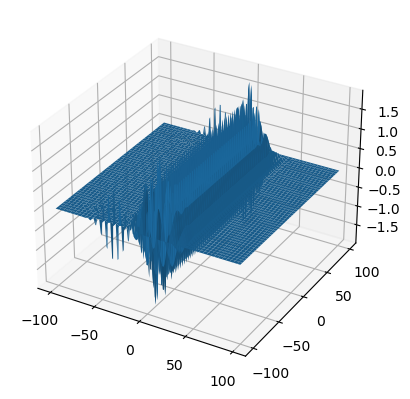

In [8]:
fig = plt.figure()
ax = plt.axes(projection="3d")
x, y = np.meshgrid(particles_num_x, particles_num_y)
surf = ax.plot_surface(x, y, particles_disp)
plt.show()

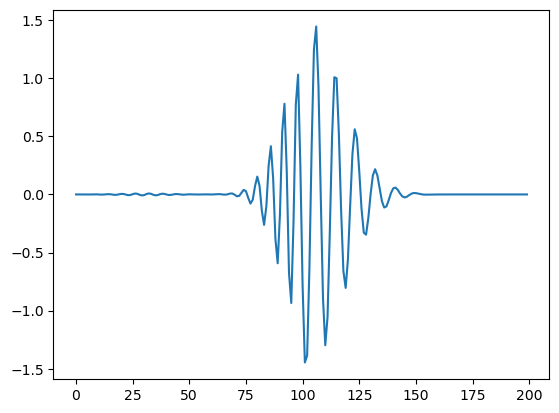

In [20]:
plt.plot(particles_disp[100])